In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

# Load LE4PD code

For now the code _only_ supports protein molecules. So from the LE4PD package we'll import __protein__ from the __molecule__ class.

In [2]:
from LE4PD.molecule import protein

### Fetch the ensemble topology

An ensemble of structures can be fetched from the [Protein Data Bank](www.rcsb.org) into LE4PD tools and saved to file in _PDB_ formats. 

In [4]:
mol = protein()

In [ ]:
mol.

Additionally, structures can be loaded directly from file. The loading method uses MDTraj, so a wide number of formats are supported. As we already downloaded a PDB file in the previous step, let's reload it now.

In [5]:
mol = protein(fetch="2n2r.pdb")

//anaconda/lib/python3.5/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


### Predict the ensemble dynamics

Here, all `protein` objects have a `predict` method, which _predicts_ the dynamics according to the _Langevin Formalism_. This will give the `protein` object a `dynamics` subclass. 

In [6]:
mol.predict()

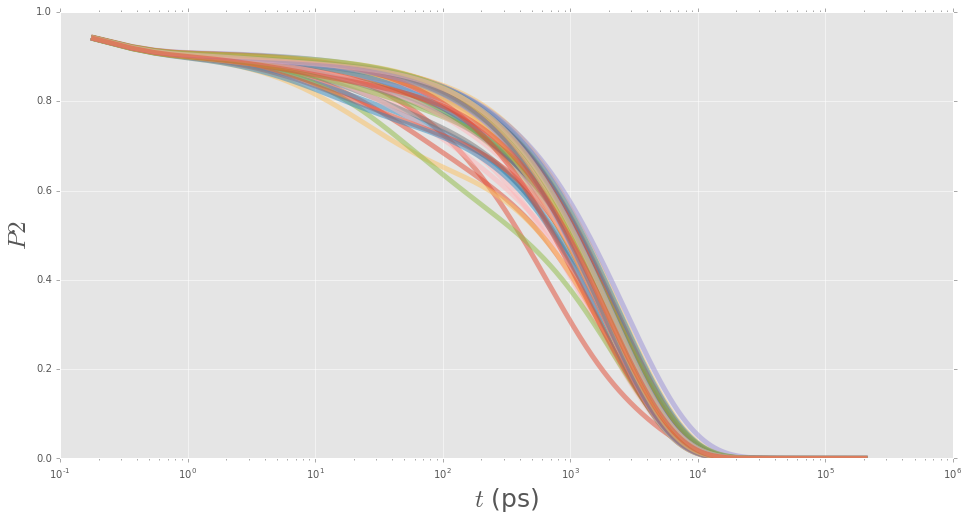

In [7]:
plt.figure(figsize=(16,8))
plt.plot(mol.dynamics.P2[2:,0], mol.dynamics.P2[2:,1:], linewidth=5, alpha=0.5)
plt.xlabel(r'$t$ (ps)', fontsize=25);plt.xscale('log')
plt.ylabel(r'$P2$', fontsize=25);plt.ylim(0,1)
plt.show()

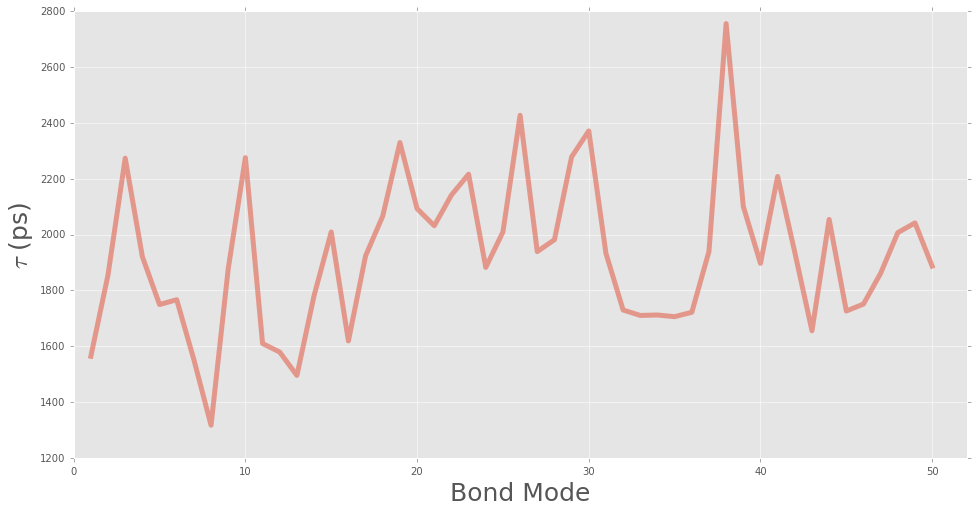

In [7]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(1,mol.n_residues), mol.dynamics.tau, linewidth=5, alpha=0.5)
plt.xlabel(r'Bond Mode', fontsize=25);plt.xlim(0,mol.n_residues+1)
plt.ylabel(r'$\tau$ (ps)', fontsize=25)
plt.show()

In [8]:
mol.dynamics.calculate_NMR_observables

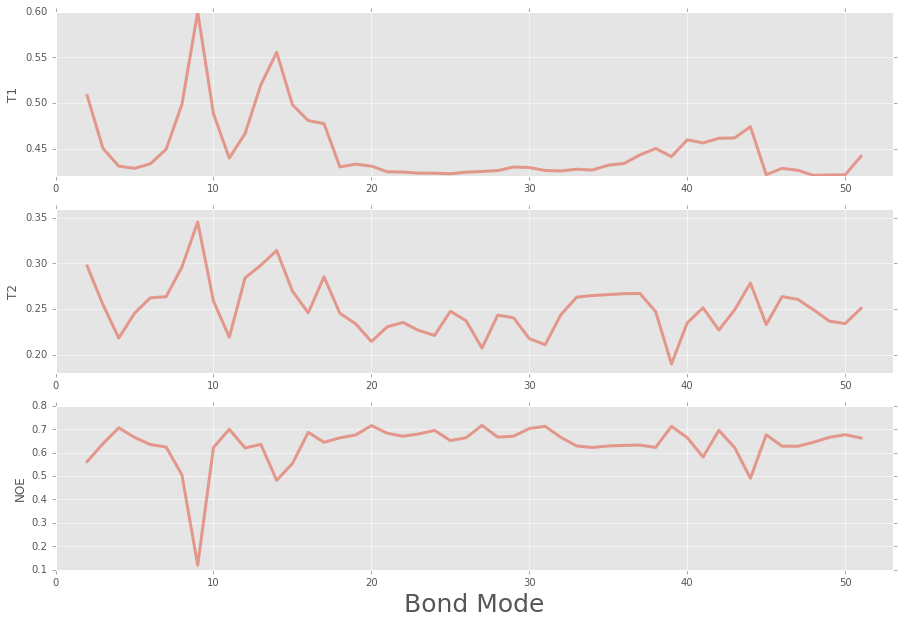

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(np.arange(2,mol.n_residues+1), mol.dynamics.T1, linewidth=3, alpha=0.5)
plt.xlim(0,mol.n_residues+2)
plt.ylabel(r'T1')
plt.subplot(3,1,2)
plt.plot(np.arange(2,mol.n_residues+1), mol.dynamics.T2, linewidth=3, alpha=0.5)
plt.xlim(0,mol.n_residues+2)
plt.ylabel(r'T2')
plt.subplot(3,1,3)
plt.plot(np.arange(2,mol.n_residues+1), mol.dynamics.NOE, linewidth=3, alpha=0.5)
plt.xlabel(r'Bond Mode', fontsize=25);plt.xlim(0,mol.n_residues+2)
plt.ylabel(r'NOE')
plt.show()

### Save mode lengths to pdb structures

All `protein.dynamics` objects contain a `save_modes_pdb` method which saves up to `max_conf` conformations, and sets from 4 to `max_mode` number of mode lengths as the B-factor term. These files can be visualized in PyMol using `cartoon putty`, or in VMD by setting the graphic representaton to $\beta$-factor.

PyMol:
>    `load mode_?.pdb`

>    `hide lines`

>    `show cartoon`

>    `cartoon putty`

>    `spectrum b, rainbow`

In [10]:
import subprocess
subprocess.call('mkdir modes/', shell=True)
mol.dynamics.save_modes_pdb()
subprocess.call('mv mode_*.pdb modes/', shell=True)

0